<a href="https://colab.research.google.com/github/JUNGBORAM/jejumaster/blob/main/%EC%97%B0%EB%A0%B9%EB%B3%84SNS%EC%82%AC%EC%9A%A9%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 연령대별 자주 사용하는 SNS플랫폼과 사용량을 분석


In [73]:
# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 2. 데이터 다운로드

1)  미디어 통계포탈 https://stat.kisdi.re.kr/main.html

2)  미디어 이용행태>소셜네트워크서비스>주로이용하는SNS계정순위 다운로드





In [201]:
# 라이브러리 설치
import pandas  as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl


# 파일 불러오기
file = './sample_data/주로_이용하는_SNS_계정.csv'
df = pd.read_csv(file, encoding='utf-8')
df

,구분별(1),구분별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12
0,구분별(1),구분별(2),사례수 (명),트위터(Twitter) (%),페이스북(Facebook) (%),싸이월드미니홈피 (%),카카오스토리 (%),인스타그램(instagram) (%),네이버밴드 (%),빙글 (%),비트윈 (%),웨이보 (%),핀터레스트 (%),틱톡 (%),기타 (%)
1,전체,소계,5725.7,16.7,45.6,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
2,성별,남,2882.2,17.7,52.3,2.2,23.4,57.4,29.8,0.1,0.2,0.8,0.1,5.7,0.0
3,성별,여,2843.5,15.7,38.8,3.2,29.2,64.8,27.3,0.0,0.2,0.1,0.8,7.2,0.2
4,연령,만10대미만,13.3,0.0,31.3,0.0,0.0,53.6,25.9,0.0,0.0,0.0,0.0,31.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,가구주와의관계,손자.녀/그배우자,55.5,11.2,60.5,2.2,8.3,82.7,14.9,0.0,0.0,0.0,1.5,5.2,0.0
81,가구주와의관계,부모(배우자부모포함),9.5,0.0,50.3,0.0,49.7,0.8,47.9,0.0,0.0,0.0,0.0,0.0,0.0
82,가구주와의관계,형제자매/그배우자,90.4,22.7,65.3,9.0,4.3,75.3,33.1,0.0,0.0,0.0,0.0,1.1,0.0
83,가구주와의관계,기타친인척,7.9,0.0,45.0,0.0,27.0,78.3,0.0,0.0,0.0,0.0,0.0,8.3,0.0


# 3. 데이터 전처리하기


1)   결측데이터확인




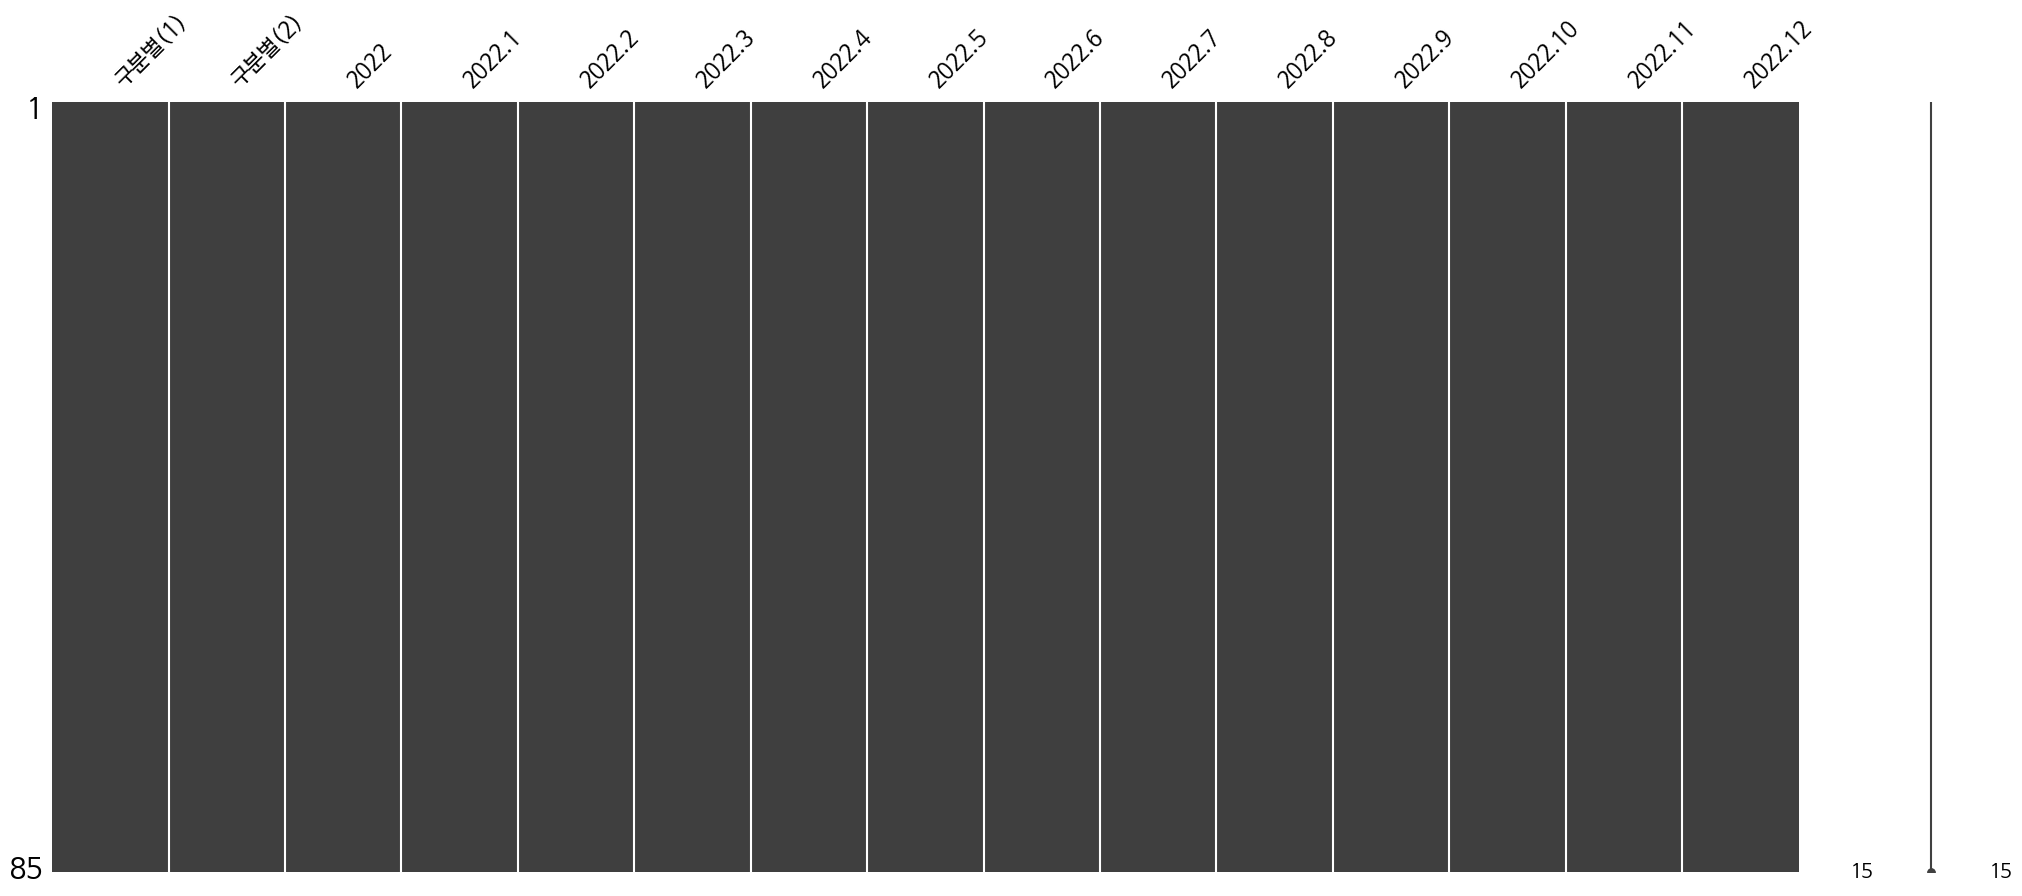

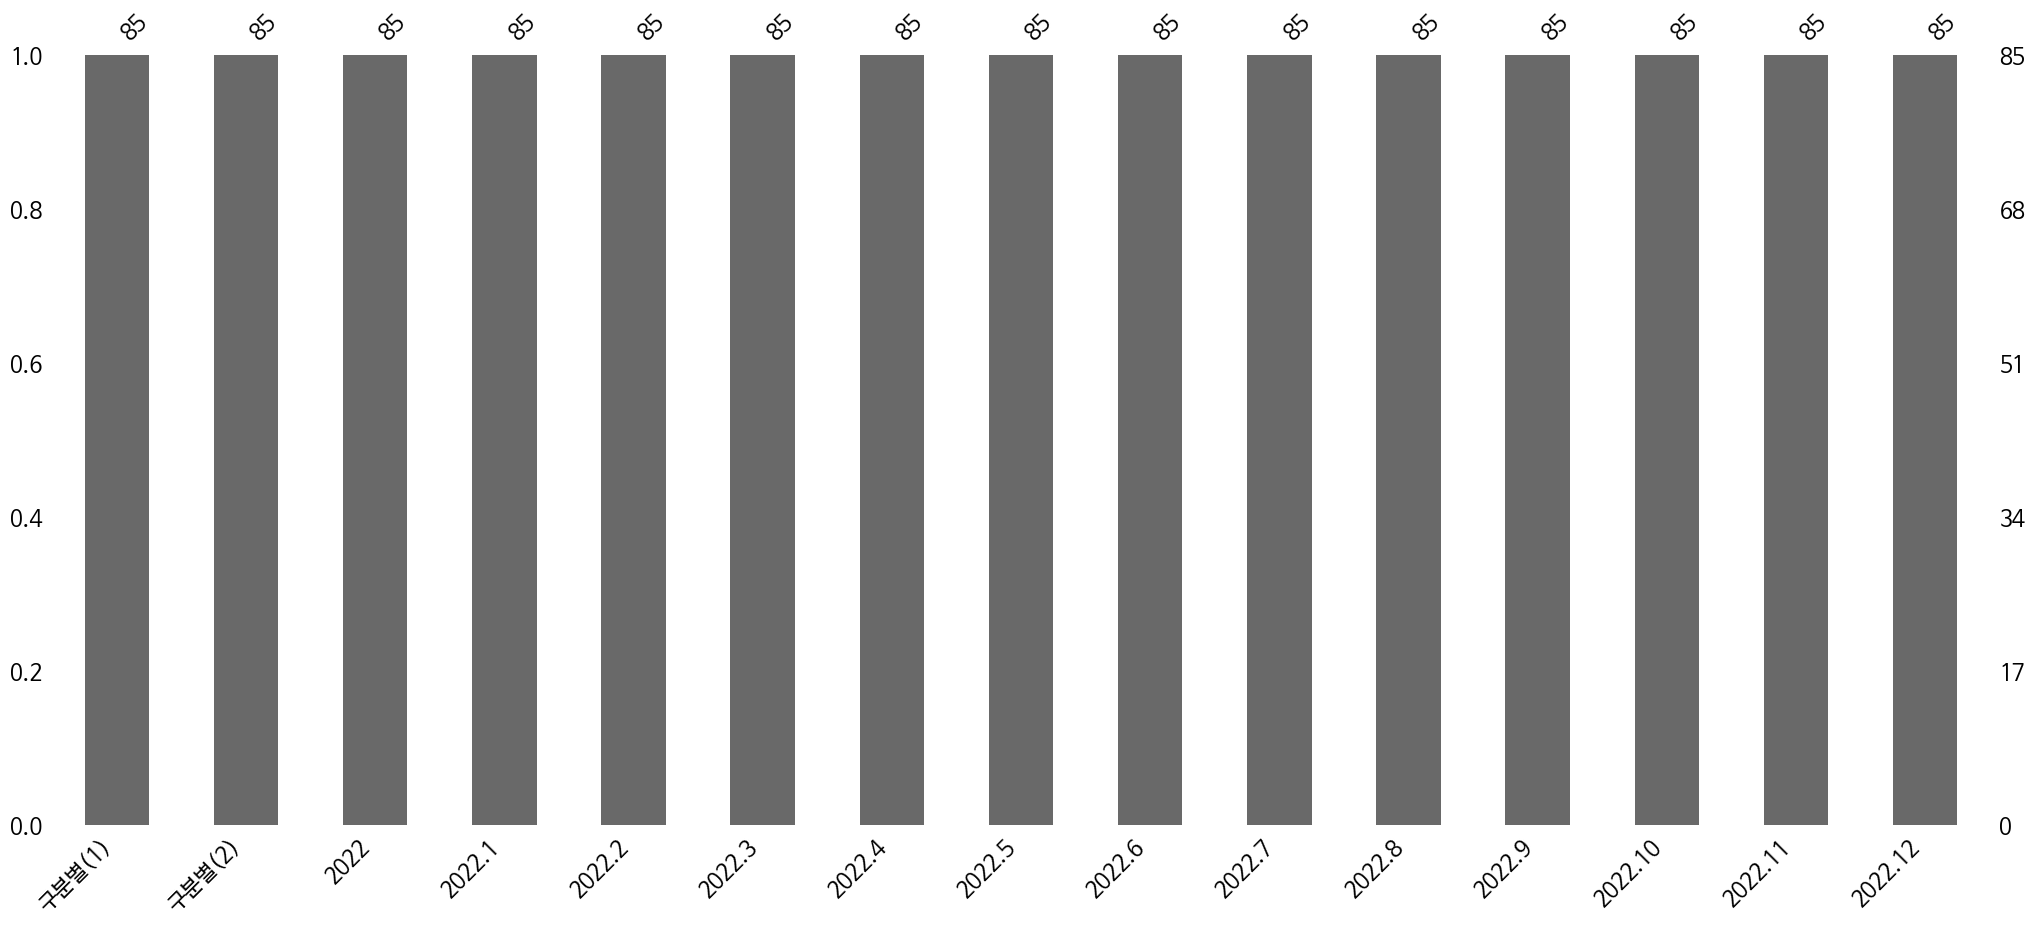

In [202]:
# 결측 데이터 시각화
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

In [203]:
# 첫행을 칼럼 이름으로 설정
df.columns = df.iloc[0]
df[1:]


,구분별(1),구분별(2),사례수 (명),트위터(Twitter) (%),페이스북(Facebook) (%),싸이월드미니홈피 (%),카카오스토리 (%),인스타그램(instagram) (%),네이버밴드 (%),빙글 (%),비트윈 (%),웨이보 (%),핀터레스트 (%),틱톡 (%),기타 (%)
1,전체,소계,5725.7,16.7,45.6,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
2,성별,남,2882.2,17.7,52.3,2.2,23.4,57.4,29.8,0.1,0.2,0.8,0.1,5.7,0.0
3,성별,여,2843.5,15.7,38.8,3.2,29.2,64.8,27.3,0.0,0.2,0.1,0.8,7.2,0.2
4,연령,만10대미만,13.3,0.0,31.3,0.0,0.0,53.6,25.9,0.0,0.0,0.0,0.0,31.5,0.0
5,연령,만10-19세,529.7,18.8,59.4,1.8,9.5,74.0,13.3,0.0,0.0,0.4,0.8,23.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,가구주와의관계,손자.녀/그배우자,55.5,11.2,60.5,2.2,8.3,82.7,14.9,0.0,0.0,0.0,1.5,5.2,0.0
81,가구주와의관계,부모(배우자부모포함),9.5,0.0,50.3,0.0,49.7,0.8,47.9,0.0,0.0,0.0,0.0,0.0,0.0
82,가구주와의관계,형제자매/그배우자,90.4,22.7,65.3,9.0,4.3,75.3,33.1,0.0,0.0,0.0,0.0,1.1,0.0
83,가구주와의관계,기타친인척,7.9,0.0,45.0,0.0,27.0,78.3,0.0,0.0,0.0,0.0,0.0,8.3,0.0


In [204]:
# 칼럼이름 확인
df.columns

Index(['구분별(1)', '구분별(2)', '사례수 (명)', '트위터(Twitter) (%)', '페이스북(Facebook) (%)',
       '싸이월드미니홈피 (%)', '카카오스토리 (%)', '인스타그램(instagram) (%)', '네이버밴드 (%)',
       '빙글 (%)', '비트윈 (%)', '웨이보 (%)', '핀터레스트 (%)', '틱톡 (%)', '기타 (%)'],
      dtype='object', name=0)

In [205]:
# 칼럼이름 변경
df.columns = ['구분', '구분별', '인원수', '트위터(%)', '페이스북(%)', '싸이월드(%)', '카카오스토리(%)',
       '인스타그램(%)', '네이버밴드(%)', '빙글(%)','비트윈(%)', '웨이보(%)','핀터레스트(%)','틱톡(%)','기타(%)']
df.head(3)

,구분,구분별,인원수,트위터(%),페이스북(%),싸이월드(%),카카오스토리(%),인스타그램(%),네이버밴드(%),빙글(%),비트윈(%),웨이보(%),핀터레스트(%),틱톡(%),기타(%)
0,구분별(1),구분별(2),사례수 (명),트위터(Twitter) (%),페이스북(Facebook) (%),싸이월드미니홈피 (%),카카오스토리 (%),인스타그램(instagram) (%),네이버밴드 (%),빙글 (%),비트윈 (%),웨이보 (%),핀터레스트 (%),틱톡 (%),기타 (%)
1,전체,소계,5725.7,16.7,45.6,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
2,성별,남,2882.2,17.7,52.3,2.2,23.4,57.4,29.8,0.1,0.2,0.8,0.1,5.7,0.0


In [206]:
df = df.drop(df.index[0])
df

,구분,구분별,인원수,트위터(%),페이스북(%),싸이월드(%),카카오스토리(%),인스타그램(%),네이버밴드(%),빙글(%),비트윈(%),웨이보(%),핀터레스트(%),틱톡(%),기타(%)
1,전체,소계,5725.7,16.7,45.6,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
2,성별,남,2882.2,17.7,52.3,2.2,23.4,57.4,29.8,0.1,0.2,0.8,0.1,5.7,0.0
3,성별,여,2843.5,15.7,38.8,3.2,29.2,64.8,27.3,0.0,0.2,0.1,0.8,7.2,0.2
4,연령,만10대미만,13.3,0.0,31.3,0.0,0.0,53.6,25.9,0.0,0.0,0.0,0.0,31.5,0.0
5,연령,만10-19세,529.7,18.8,59.4,1.8,9.5,74.0,13.3,0.0,0.0,0.4,0.8,23.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,가구주와의관계,손자.녀/그배우자,55.5,11.2,60.5,2.2,8.3,82.7,14.9,0.0,0.0,0.0,1.5,5.2,0.0
81,가구주와의관계,부모(배우자부모포함),9.5,0.0,50.3,0.0,49.7,0.8,47.9,0.0,0.0,0.0,0.0,0.0,0.0
82,가구주와의관계,형제자매/그배우자,90.4,22.7,65.3,9.0,4.3,75.3,33.1,0.0,0.0,0.0,0.0,1.1,0.0
83,가구주와의관계,기타친인척,7.9,0.0,45.0,0.0,27.0,78.3,0.0,0.0,0.0,0.0,0.0,8.3,0.0



2)   그룹핑하기




In [207]:
df.dtypes

구분           object
구분별          object
인원수          object
트위터(%)       object
페이스북(%)      object
싸이월드(%)      object
카카오스토리(%)    object
인스타그램(%)     object
네이버밴드(%)     object
빙글(%)        object
비트윈(%)       object
웨이보(%)       object
핀터레스트(%)     object
틱톡(%)        object
기타(%)        object
dtype: object

In [208]:
# 숫자형으로 변환
for col in df.columns:
    if col not in ['구분', '구분별']:
        df[col] = df[col].astype(float)
df.dtypes

구분            object
구분별           object
인원수          float64
트위터(%)       float64
페이스북(%)      float64
싸이월드(%)      float64
카카오스토리(%)    float64
인스타그램(%)     float64
네이버밴드(%)     float64
빙글(%)        float64
비트윈(%)       float64
웨이보(%)       float64
핀터레스트(%)     float64
틱톡(%)        float64
기타(%)        float64
dtype: object

In [209]:
df.groupby(['구분','구분별'])['인원수'].agg(['mean', 'sum', 'count'])

mean     sum  count
구분      구분별                           
가구원수1   1인가구      711.2   711.2      1
        2인가구     1272.2  1272.2      1
        3인이상가구   3742.2  3742.2      1
가구주와의관계 가구주      2341.7  2341.7      1
        가구주의배우자  1298.8  1298.8      1
...                 ...     ...    ...
학력1     고졸이하     1629.9  1629.9      1
        대졸이하     3565.2  3565.2      1
        대학원재학이상   121.1   121.1      1
        중졸이하      277.0   277.0      1
        초졸이하      132.4   132.4      1

[84 rows x 3 columns]

<Axes: xlabel='구분,구분별'>

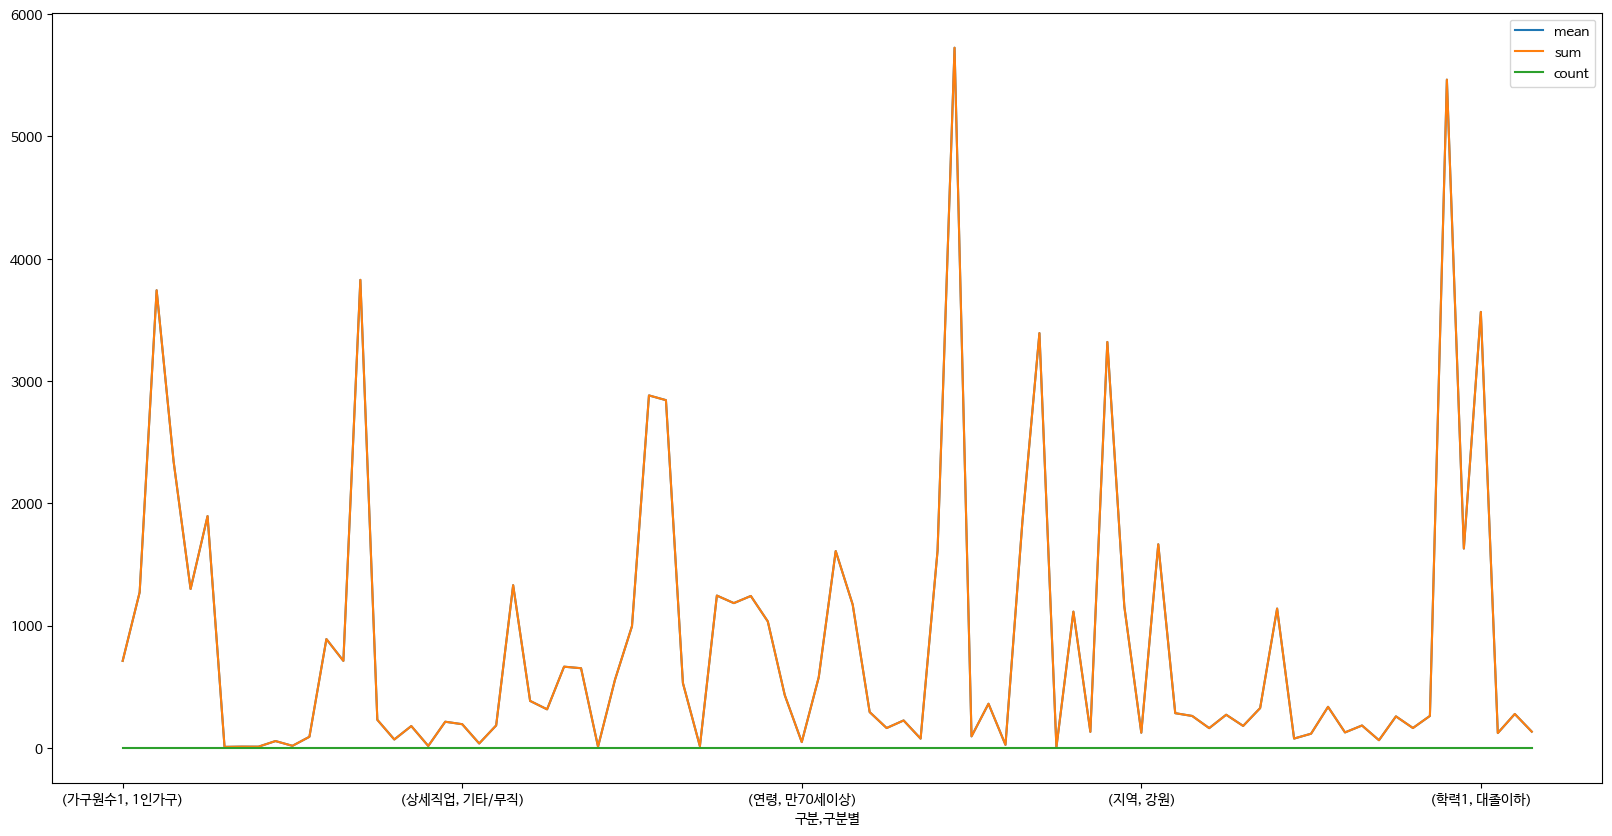

In [210]:
df_temp = df.groupby(['구분','구분별'])['인원수'].agg(['mean', 'sum', 'count'])
df_temp.plot(figsize=(20, 10))

In [211]:
# 구분 칼럼에서 전체행과 연령행 추출
df_age = df[df['구분'].isin(['연령','전체'])]
print(df_age)

    구분      구분별     인원수  트위터(%)  페이스북(%)  싸이월드(%)  카카오스토리(%)  인스타그램(%)  \
1   전체       소계  5725.7    16.7     45.6      2.7       26.3      61.1   
4   연령   만10대미만    13.3     0.0     31.3      0.0        0.0      53.6   
5   연령  만10-19세   529.7    18.8     59.4      1.8        9.5      74.0   
6   연령  만20-29세  1245.3    26.4     51.6      2.9       15.5      85.1   
7   연령  만30-39세  1183.6    16.6     45.6      3.4       23.8      72.7   
8   연령  만40-49세  1242.0    17.8     44.4      3.1       27.9      59.9   
9   연령  만50-59세  1033.8     8.8     40.4      2.5       40.2      35.0   
10  연령  만60-69세   430.8     4.9     30.8      0.8       44.6      15.3   
11  연령   만70세이상    47.1     1.3     15.4      0.0       53.0      13.3   

    네이버밴드(%)  빙글(%)  비트윈(%)  웨이보(%)  핀터레스트(%)  틱톡(%)  기타(%)  
1       28.6    0.1     0.2     0.4       0.4    6.4    0.1  
4       25.9    0.0     0.0     0.0       0.0   31.5    0.0  
5       13.3    0.0     0.0     0.4       0.8   23.7    0.0  
6       18.

In [212]:
# 인원수만 추출하기 위해 복사
df_age_copy = df_age.copy()

# 각 연령멸 인원수 추출
df_age_copy_selected = df_age_copy[['구분별', '인원수']]
df_age_copy_selected = df_age_copy_selected[df_age_copy_selected['구분별'] != '소계']
df_age_copy_selected

,구분별,인원수
4,만10대미만,13.3
5,만10-19세,529.7
6,만20-29세,1245.3
7,만30-39세,1183.6
8,만40-49세,1242.0
9,만50-59세,1033.8
10,만60-69세,430.8
11,만70세이상,47.1


In [213]:
# 필요없는 열 삭제
df_age = df_age.drop(columns=['구분','인원수'])
df_age

,구분별,트위터(%),페이스북(%),싸이월드(%),카카오스토리(%),인스타그램(%),네이버밴드(%),빙글(%),비트윈(%),웨이보(%),핀터레스트(%),틱톡(%),기타(%)
1,소계,16.7,45.6,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
4,만10대미만,0.0,31.3,0.0,0.0,53.6,25.9,0.0,0.0,0.0,0.0,31.5,0.0
5,만10-19세,18.8,59.4,1.8,9.5,74.0,13.3,0.0,0.0,0.4,0.8,23.7,0.0
6,만20-29세,26.4,51.6,2.9,15.5,85.1,18.7,0.1,0.1,0.2,0.8,6.7,0.1
7,만30-39세,16.6,45.6,3.4,23.8,72.7,20.5,0.0,0.7,1.4,0.0,4.5,0.0
8,만40-49세,17.8,44.4,3.1,27.9,59.9,34.7,0.0,0.0,0.4,0.5,4.9,0.1
9,만50-59세,8.8,40.4,2.5,40.2,35.0,41.4,0.1,0.0,0.0,0.3,2.5,0.0
10,만60-69세,4.9,30.8,0.8,44.6,15.3,46.7,0.3,0.0,0.0,0.1,2.9,0.6
11,만70세이상,1.3,15.4,0.0,53.0,13.3,56.0,0.0,0.0,0.0,0.0,7.0,0.0




3)   파일저장하기



In [217]:
# 가공된 데이터 신규 파일로 저장하기
file = './sample_data/연령별SNS플랫폼사용량.csv'
df.to_csv(file, encoding='utf-8', mode='w', index=True)

In [214]:
plt.rc('font', family='NanumBarunGothic')

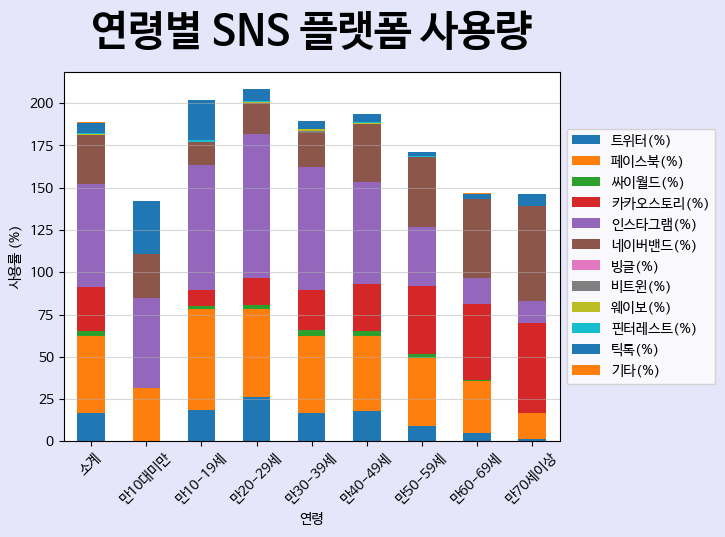

In [215]:
# '구분별' 열을 인덱스로 설정
df_age.set_index('구분별', inplace=True)

# figure와 axes 생성
fig, ax = plt.subplots()

# figure 배경색 설정
fig.patch.set_facecolor('lavender')

# 막대그래프 그리기
df_age.plot(kind='bar', stacked=True, ax=ax)

plt.title('연령별 SNS 플랫폼 사용량', pad = 20,
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('연령')
plt.ylabel('사용률 (%)')
plt.xticks(rotation=45)

# 범례를 그래프 밖으로 옮기기
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 그리드 추가
plt.grid(True, axis = 'y', alpha = 0.5)

# 막대그래프 안에 각 막대의 값을 표시
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     ax.text(x+width/2,
#             y+height/2,
#             '{:.1f} '.format(height),
#             horizontalalignment='center',
#             verticalalignment='center')

plt.show()

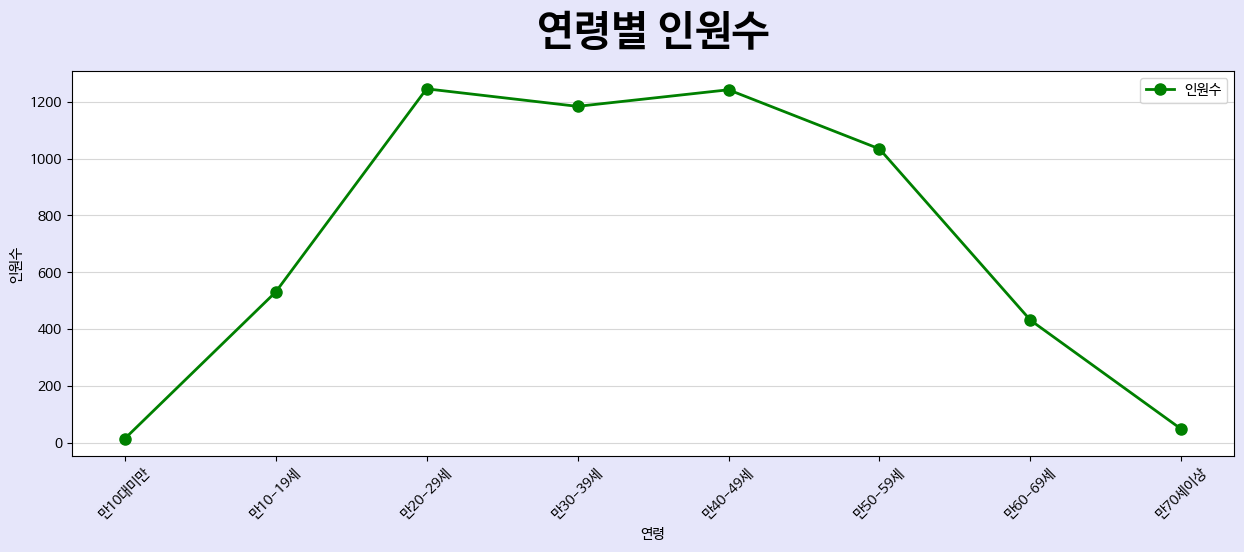

In [216]:
# '인원수' 열을 숫자형으로 변환
df_age_copy_selected['인원수'] = pd.to_numeric(df_age_copy_selected['인원수'])

# figure와 axes 생성
fig, ax = plt.subplots(figsize=(15, 5))

# figure 배경색 설정
fig.patch.set_facecolor('lavender')

# 선 그래프 그리기
df_age_copy_selected.plot(kind='line', x='구분별', y='인원수',color='green', marker='o',linestyle='solid',
         linewidth=2, markersize=8, ax=ax)

plt.title('연령별 인원수',pad = 20,
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('연령')
plt.ylabel('인원수')
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()


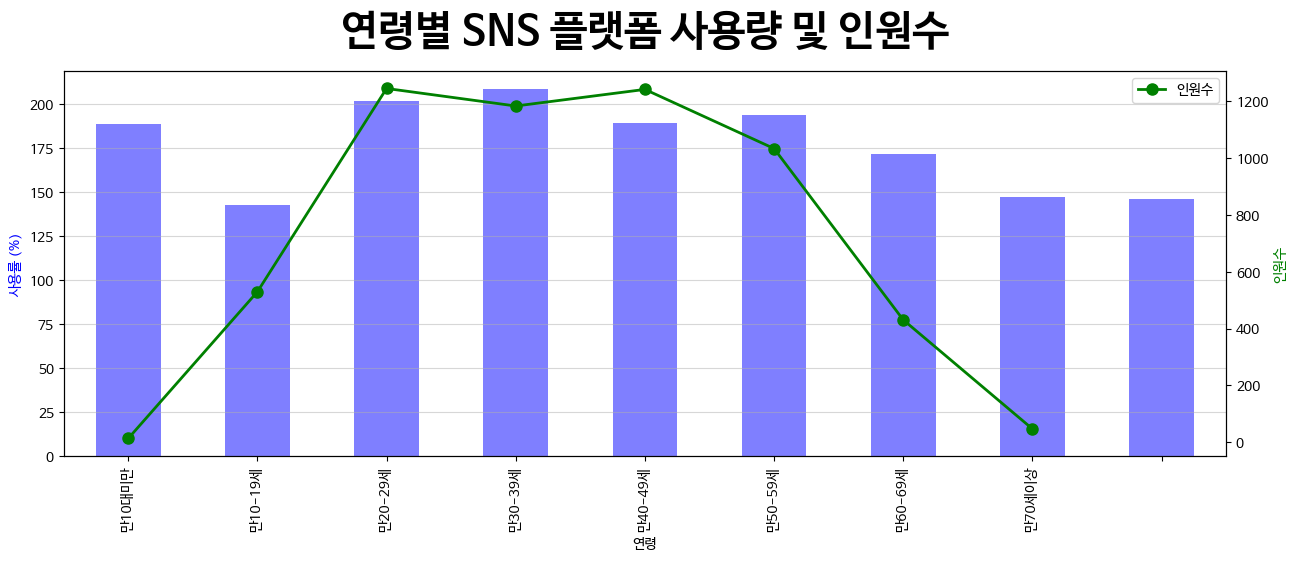

In [222]:
# figure와 axes 생성
fig, ax1 = plt.subplots(figsize=(15, 5))

# 첫 번째 그래프 그리기
df_age.plot(kind='bar', stacked=True, ax=ax1, color='blue', alpha=0.5 , legend=None)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 그래프 그리기
df_age_copy_selected.plot(kind='line', x='구분별', y='인원수', color='green', marker='o', linestyle='solid',
         linewidth=2, markersize=8, ax=ax2, )

# 타이틀, 레이블 등 설정
ax1.set_title('연령별 SNS 플랫폼 사용량 및 인원수', pad = 20,
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
ax1.set_xlabel('연령')
ax1.set_ylabel('사용률 (%)', color='blue')
ax2.set_ylabel('인원수', color='green')
plt.xticks(rotation=45)


# 그리드 추가
ax1.grid(True, axis = 'y', alpha = 0.5)
